In [1]:
import numpy as np
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import peakutils

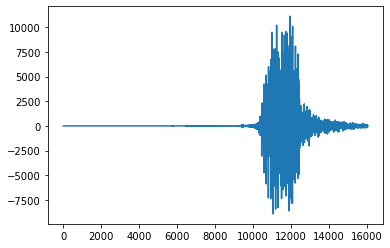

In [2]:
frequency, wave = wavfile.read("male_a_spa.wav")
channel_1 = wave[:,0]
plt.plot(channel_1)

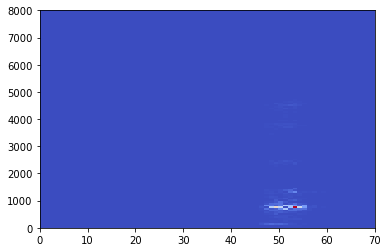

In [18]:
frequencies, time, spectrogram = signal.spectrogram(channel_1, frequency)
cmap=get_cmap("coolwarm")
plt.pcolormesh(np.arange(time.shape[0]), frequencies, spectrogram,cmap=cmap)

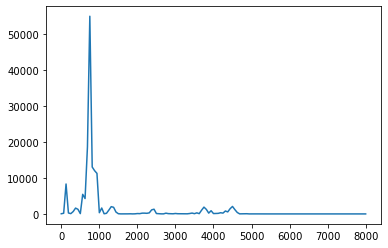

In [4]:
# Exercise
plt.plot(frequencies, spectrogram.T[50])

[ 1 12 21]
[  62.5  750.  1312.5] [ 89.487946 690.694    802.7474  ]


Text(0.5, 1.0, 'First estimate')

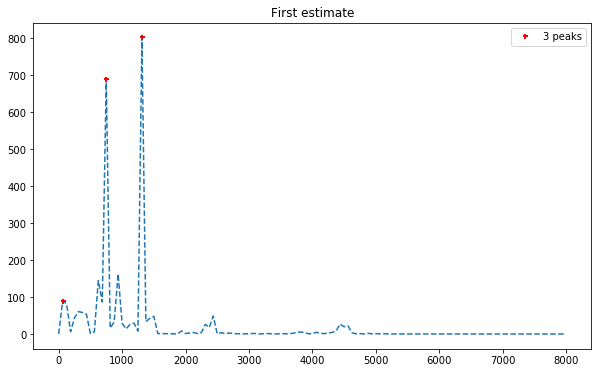

In [48]:
from peakutils.plot import plot as pplot
time_slot = 59
indexes = peakutils.indexes(spectrogram.T[time_slot], thres=0.1, min_dist=5)
print(indexes)
print(frequencies[indexes], spectrogram.T[time_slot][indexes])
plt.figure(figsize=(10,6))
pplot(frequencies, spectrogram.T[time_slot], indexes)
plt.title('First estimate')

In [8]:
type(indexes)

numpy.ndarray

In [42]:
all_values = list()
f1 = list()
for index, time_bin in enumerate(spectrogram.T):
    indexes = peakutils.indexes(time_bin, thres=0.1, min_dist=5)
    if len(indexes) > 0:
        all_values.append((index, frequencies[indexes], time_bin[indexes]))
        f1.append(frequencies[indexes[0]])
    else:
        f1.append(0)
all_values

[(24,
  array([ 125. , 3437.5, 7937.5]),
  array([2.8232839e-06, 1.2982080e-05, 2.3022963e-06], dtype=float32)),
 (25,
  array([  62.5, 3000. , 3437.5, 4000. , 4500. ]),
  array([0.00158002, 0.01007659, 0.01092962, 0.01132233, 0.00649134],
        dtype=float32)),
 (26,
  array([ 125., 2500., 3000., 4000.]),
  array([0.03290642, 0.00352091, 0.00609105, 0.01254807], dtype=float32)),
 (27, array([62.5]), array([0.06649886], dtype=float32)),
 (28,
  array([ 125. ,  562.5, 1875. ]),
  array([0.1718327 , 0.03296265, 0.0212158 ], dtype=float32)),
 (29,
  array([  62.5,  562.5, 1937.5, 3437.5]),
  array([0.32421437, 0.05903228, 0.07637128, 0.03484809], dtype=float32)),
 (30,
  array([ 125. , 2000. , 3000. , 3500. , 3937.5, 4375. ]),
  array([0.10059575, 0.09722298, 0.02293504, 0.16740878, 0.11336946,
         0.03586498], dtype=float32)),
 (31,
  array([  62.5, 2000. , 4062.5]),
  array([0.78989476, 0.12129941, 0.10821937], dtype=float32)),
 (32,
  array([ 250. , 2000. , 3437.5, 4000. , 4562.

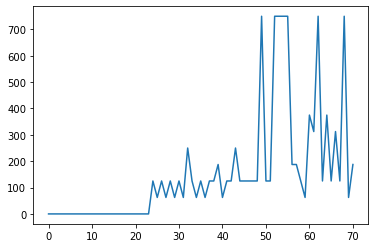

In [43]:
plt.plot(np.arange(len(f1)), f1)